In [1]:
import sys
sys.path.append("c:/workspace/tf_unet")
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet.image_util import ImageDataProvider
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data = ImageDataProvider(search_path = "c:/data/xview2/train/combine/*", mask_suffix="post_disaster_mask.tif", data_suffix="post_disaster.png")

Number of files used: 78
Number of channels: 3
Number of classes: 2


In [3]:
d = data(1)
x_test = d[0]
y_test = d[1]
print(x_test.shape)
print(y_test.shape)

(1, 1024, 1024, 3)
(1, 1024, 1024, 2)


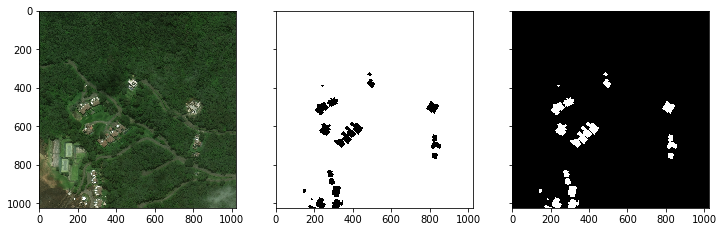

In [4]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...])
ax[1].imshow(y_test[0,...,0],cmap="gray")
ax[2].imshow(y_test[0,...,1],cmap="gray")

In [5]:
net = unet.Unet(channels=data.channels, n_class=data.n_class, features_root=16, layers=3)

2019-10-23 12:28:54,316 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [7]:
trainer = unet.Trainer(net,optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [8]:
path = trainer.train(data, "./unet_trained", training_iters=32, epochs=6, display_step=2, restore=True)

INFO:tensorflow:Restoring parameters from ./unet_trained\model.ckpt


2019-10-23 12:29:57,727 Restoring parameters from ./unet_trained\model.ckpt
2019-10-23 12:29:57,805 Model restored from file: ./unet_trained\model.ckpt
2019-10-23 12:30:05,395 Verification error= 6.1%, loss= 0.2396
2019-10-23 12:30:06,508 Start optimization
2019-10-23 12:30:15,624 Iter 0, Minibatch Loss= 0.1994, Training Accuracy= 0.9343, Minibatch error= 6.6%
2019-10-23 12:30:17,973 Iter 2, Minibatch Loss= 0.0486, Training Accuracy= 0.9868, Minibatch error= 1.3%
2019-10-23 12:30:20,511 Iter 4, Minibatch Loss= 0.0493, Training Accuracy= 0.9871, Minibatch error= 1.3%
2019-10-23 12:30:22,917 Iter 6, Minibatch Loss= 0.0165, Training Accuracy= 0.9978, Minibatch error= 0.2%
2019-10-23 12:30:25,355 Iter 8, Minibatch Loss= 0.0517, Training Accuracy= 0.9850, Minibatch error= 1.5%
2019-10-23 12:30:27,828 Iter 10, Minibatch Loss= 0.3580, Training Accuracy= 0.8750, Minibatch error= 12.5%
2019-10-23 12:30:30,186 Iter 12, Minibatch Loss= 0.0220, Training Accuracy= 0.9969, Minibatch error= 0.3%
2019

2019-10-23 12:33:20,387 Iter 140, Minibatch Loss= 0.1149, Training Accuracy= 0.9686, Minibatch error= 3.1%
2019-10-23 12:33:22,915 Iter 142, Minibatch Loss= 0.0332, Training Accuracy= 0.9933, Minibatch error= 0.7%
2019-10-23 12:33:25,333 Iter 144, Minibatch Loss= 0.0485, Training Accuracy= 0.9873, Minibatch error= 1.3%
2019-10-23 12:33:27,842 Iter 146, Minibatch Loss= 0.2153, Training Accuracy= 0.9228, Minibatch error= 7.7%
2019-10-23 12:33:30,440 Iter 148, Minibatch Loss= 0.0821, Training Accuracy= 0.9925, Minibatch error= 0.8%
2019-10-23 12:33:32,954 Iter 150, Minibatch Loss= 0.0135, Training Accuracy= 0.9983, Minibatch error= 0.2%
2019-10-23 12:33:35,433 Iter 152, Minibatch Loss= 0.0920, Training Accuracy= 0.9707, Minibatch error= 2.9%
2019-10-23 12:33:37,874 Iter 154, Minibatch Loss= 0.0577, Training Accuracy= 0.9993, Minibatch error= 0.1%
2019-10-23 12:33:40,357 Iter 156, Minibatch Loss= 0.1453, Training Accuracy= 0.9584, Minibatch error= 4.2%
2019-10-23 12:33:42,891 Iter 158, Min

In [9]:
name= "hurricane-florence_00000051_post_disaster"
img = Image.open("C:/data/xview2/train/combine/"+name+".png")
ori_mask = Image.open("C:/data/xview2/train/combine/"+name+"_mask.tif")
x_test = np.array(img)
print(x_test.shape)
x_test = np.expand_dims(x_test, axis=0)
x_test.shape
prediction = net.predict("./unet_trained/model.ckpt", x_test)

(1024, 1024, 3)
INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-10-23 12:35:16,988 Restoring parameters from ./unet_trained/model.ckpt
2019-10-23 12:35:17,066 Model restored from file: ./unet_trained/model.ckpt


Shape 1024


(1, 984, 984, 2)


Text(0.5, 1.0, 'Orignal Mask')

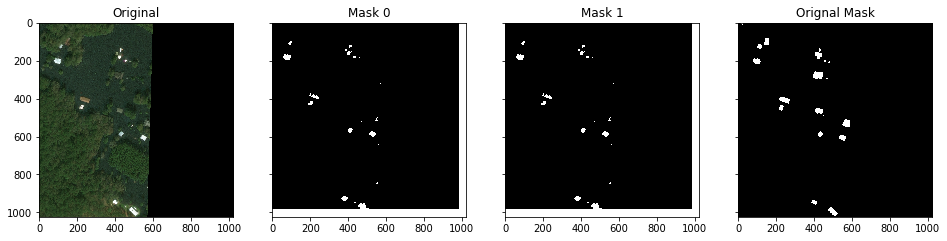

In [14]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16,4))
mask0 = prediction[0,...,0] >0.9999
mask1 = prediction[0,...,1]< 0.0001
print(prediction.shape)
ax[0].imshow(x_test[0])
ax[1].imshow(mask0, cmap="gray")
ax[2].imshow(mask1,cmap="gray")
ax[3].imshow(ori_mask, cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("Mask 0")
ax[2].set_title("Mask 1")
ax[3].set_title("Orignal Mask")

In [ ]:
print(prediction)

In [ ]:
import os

pngs = list(filter(lambda x: True if x.endswith("png") else False,[f for f in os.listdir("c:/data/xview2/train/combine")]))

for i in pngs:
    
    img = Image.open(os.path.join("c:/data/xview2/train/combine",i))
    fn=i.replace(".png",".tif")
    img.save("./"+fn)

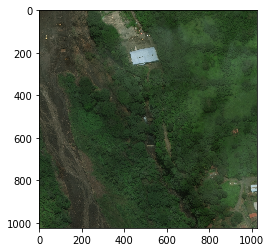

In [15]:
arr=np.array(Image.open("c:/data/xview2/train/combine/guatemala-volcano_00000000_post_disaster.tif"),np.float32)
arr=arr/255
plt.imshow(arr)

In [20]:
print(prediction.shape[2])
abc=util.to_rgb(prediction[..., 1].reshape(-1, prediction.shape[2], 1))
print(abc.shape)
img=Image.fromarray(arr).convert("L")

984
(984, 984, 3)


TypeError: Cannot handle this data type

2019-10-23 12:36:33,179 Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


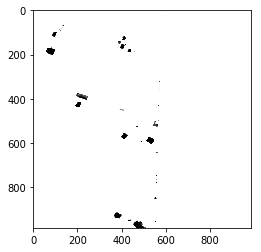